data shape: (1797, 64)
target shape: (1797,)


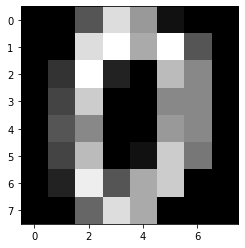

In [1]:
from sklearn.datasets import load_digits 
import matplotlib.pyplot as plt 
# 载入手写数字数据 
digits = load_digits() 
# 打印数据集的 shape，行表示数据集个数，列表示每个数据的特征数 
print('data shape:',digits.data.shape) 
# 打印数据标签的 shape，数据标签的值为 0-9 
print('target shape:',digits.target.shape) 
# 准备显示第 0 张图片，图片为灰度图 
plt.imshow(digits.images[0],cmap='gray') 
# 显示图片 
plt.show()

In [14]:
# 导入 numpy 科学计算库 
import numpy as np 
# 载入画图工具包
import matplotlib.pyplot as plt 
# 导入手写数字数据集 
from sklearn.datasets import load_digits
# 用于标签二值化处理，把标签转成独热编码 one-hot 的格式 
from sklearn.preprocessing import LabelBinarizer 
# 用于把数据集拆分为训练集和测试集 
from sklearn.model_selection import train_test_split 
# 用于评估分类结果 
from sklearn.metrics import classification_report,confusion_matrix

#定义sigmoid函数
def sigmoid(x):
    return 1/(1+np.exp(-x))
#定义sigmoid函数导数
def dsigmoid(x):
    return x*(1-x)


Start training
steps:0 accuracy:0.078 loss:12.511
steps:3000 accuracy:0.753 loss:3.257
steps:6000 accuracy:0.878 loss:1.538
steps:9000 accuracy:0.882 loss:1.516
steps:12000 accuracy:0.882 loss:1.646
steps:15000 accuracy:0.953 loss:0.537
steps:18000 accuracy:0.969 loss:0.376
steps:21000 accuracy:0.969 loss:0.339
steps:24000 accuracy:0.971 loss:0.394
steps:27000 accuracy:0.973 loss:0.313
steps:30000 accuracy:0.971 loss:0.341
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.91      1.00      0.95        42
           2       1.00      1.00      1.00        49
           3       1.00      0.93      0.97        46
           4       0.98      0.98      0.98        53
           5       0.92      0.98      0.95        45
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        41
           8       0.95      0.93      0.94        40
           9       0.95      0.8

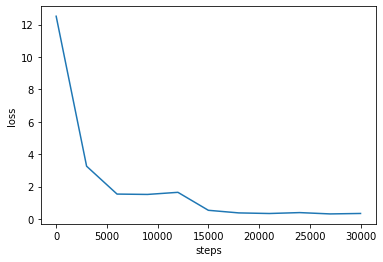

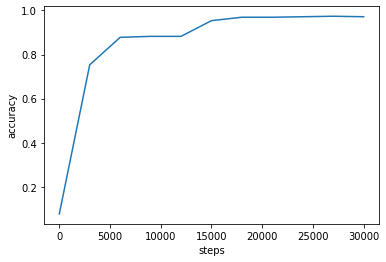

In [15]:
#定义神经网络分类
class NeuralNetwork: 
    # 初始化网络，定义网络结构 
    # 假设传入(64,100,10)，说明定义： 
    # 输入层 64 个神经元，隐藏层 100 个神经元，输出层 10 个神经元 （为什么10个神经元？？）
    def __init__(self,layers): 
        # 权值的初始化，范围-1 到 1 
        self.W1 = np.random.random([layers[0],layers[1]])*2-1 
        self.W2 = np.random.random([layers[1],layers[2]])*2-1 
        # 初始化偏置值 
        self.b1 = np.zeros([layers[1]]) 
        self.b2 = np.zeros([layers[2]]) 
        # 定义空 list 用于保存 list 
        self.loss = [] 
        # 定义空 list 用于保存 
        self.accuracy = [] 
    # 训练模型 
    # X 为数据输入 
    # T 为数据对应的标签 
    # lr 学习率 
    # steps 训练次数 
    # batch 批次大小 
    # 使用批量随机梯度下降法，每次随机抽取一个批次的数据进行训练 
    def train(self,X,T,lr=0.1,steps=20000,test=5000,batch=50): 
    # 进行 steps+1 次训练
        for n in range(steps+1): 
            # 随机选取一个批次数据 
            index = np.random.randint(0,X.shape[0],batch)  
            x = X[index] 
            # 计算隐藏层输出 
            L1 = sigmoid(np.dot(x,self.W1)+self.b1) 
            # 计算输出层输出 
            L2 = sigmoid(np.dot(L1,self.W2)+self.b2) 
            # 求输出层的学习信号 
            delta_L2 = (T[index]-L2)*dsigmoid(L2) 
            # 求隐藏层的学习信号 
            delta_L1= delta_L2.dot(self.W2.T)*dsigmoid(L1) 
            # 求隐藏层到输出层的权值改变 
            # 由于一次计算了多个样本，所以需要求平均 
            self.W2 += lr * L1.T.dot(delta_L2) / x.shape[0] 
            # 求输入层到隐藏层的权值改变 
            # 由于一次计算了多个样本，所以需要求平均 
            self.W1 += lr * x.T.dot(delta_L1) / x.shape[0] 
             # 改变偏置值
            self.b2 = self.b2 + lr * np.mean(delta_L2, axis=0) 
            self.b1 = self.b1 + lr * np.mean(delta_L1, axis=0) 
             
            # 每训练 5000 次预测一次准确率 
            if n%test==0: 
                # 预测测试集的预测结果 
                Y2 = self.predict(X_test) 
                # 取得预测结果最大的所在的索引 
                # 例如最大值所在的索引是 3，那么预测结果就是 3 
                predictions = np.argmax(Y2,axis=1) 
                # 计算准确率 
                # np.equal(predictions,y_test)判断预测结果和真实标签是否相等，相等返回True，不相等返回 False 
                # np.equal(predictions,y_test)执行后得到一个包含多个 True 和 False 的列表 
                # 然后用 np.mean 对列表求平均 True 为 1，False 为 0。 
                # 例如一共有 10 个结果，9 个 True，一个 False，平均后的结果为 0.9，即预测的准确率为 90% 
                acc = np.mean(np.equal(predictions,y_test)) 
                # 计算 loss 
                l = np.mean(np.square(y_test - predictions) / 2) 
                # 保存准确率 
                self.accuracy.append(acc) 
                # 保存 loss 值 
                self.loss.append(l) 
                # 打印训练次数,准确率和 loss 
                print('steps:%d accuracy:%.3f loss:%.3f' % (n,acc,l))  
                # 模型预测结果 
    def predict(self,x): 
        L1 = sigmoid(np.dot(x,self.W1)+self.b1)#隐层输出 
        L2 = sigmoid(np.dot(L1,self.W2)+self.b2)#输出层输出 
        return L2 
# 程序从这里开始运行 
# 定义训练次数 
steps = 30001 
# 定义测试周期数 
test = 3000 
# 载入数据 
digits = load_digits() 
# 得到数据 
X = digits.data 
# 得到标签 
y = digits.target 
# 输入数据归一化，有助于加快训练速度 
# X 中原来的数值范围是 0-255 之间，归一化后变成 0-1 之间 
X -= X.min() 
X /= X.max() - X.min() 
# 分割数据 1/4 为测试数据，3/4 为训练数据 
# 有 1347 个训练数据，450 个测试数据 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)  
 
# 创建网络,输入层 64 个神经元，隐藏层 100 个神经元，输出层 10 个神经元 
nm = NeuralNetwork([64,100,10]) 
# 标签转化为独热编码 one-hot 的格式 
labels_train = LabelBinarizer().fit_transform(y_train) 
 
# 开始训练 
print('Start training') 
nm.train(X_train,labels_train,steps=steps,test=test) 
 
# 预测测试数据 
predictions = nm.predict(X_test)  
# predictions.shape 为(450,10) 
# y_test.shape 为(450,) 
# 所以需要取得预测结果最大的所在的索引，该索引就是网络预测的结果 
# np.argmax(predictions,axis=1)执行后得到的形状也变成了(450,) 
predictions = np.argmax(predictions,axis=1) 
# 对比测试数据的真实标签与网络预测结果，得到准确率，召回率和 F1 值 
print(classification_report(y_test,predictions)) 
# 对于测试数据的真实标签与网络预测结果，得到混淆矩阵 
print(confusion_matrix(y_test,predictions)) 
 
# 训练次数与 loss 的关系图 
plt.plot(range(0,steps+1,test),nm.loss) 
plt.xlabel('steps') 
plt.ylabel('loss') 
plt.show() 
 
# 训练次数与 accuracy 的关系图 
plt.plot(range(0,steps+1,test),nm.accuracy) 
plt.xlabel('steps') 
plt.ylabel('accuracy') 
plt.show()
